In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
%matplotlib inline

# Import listing.csv
listings_df = pd.read_csv('./listings.csv')
#listings_df.head()


In [25]:
# Import calendar.csv
calendar_df = pd.read_csv('./calendar.csv')
#calendar_df.head()

In [3]:
# Number of unique listing
unique_listing_count = listings_df['id'].nunique()
print('Number of listings: ' + str(unique_listing_count))


Number of listings: 3818


In [4]:
# Data reservations period

# Min and max date
min_date = calendar_df['date'].min()
max_date = calendar_df['date'].max()

print(f'Minimum date: {min_date}')
print(f'Maximum date: {max_date}')

# Number of unique listing in calendar. Parece que tenemos el mismo número de listings
unique_calendar_listing_count = calendar_df['listing_id'].nunique()
print('Number of listings at calendar: ' + str(unique_calendar_listing_count))

Minimum date: 2016-01-04
Maximum date: 2017-01-02
Number of listings at calendar: 3818


In [5]:
# % of NaN in 'price' column
percent_price_nan = calendar_df['price'].isna().mean() * 100

# % of NaN in 'available' column
percent_available_nan = calendar_df['available'].isna().mean() * 100

# % of NaN in 'price' when 'available' is True
percent_price_nan_available_true = calendar_df[calendar_df['available'] == 't']['price'].isna().mean() * 100

# % of NaN in 'price' when 'available' is False
percent_price_nan_available_false = calendar_df[calendar_df['available'] == 'f']['price'].isna().mean() * 100

print(f"% of NaN in 'price': {percent_price_nan}%")
print(f"% of NaN in 'available': {percent_available_nan}%")
print(f"% of NaN in 'price' when 'available' is True: {percent_price_nan_available_true}%")
print(f"% of NaN in 'price' when 'available' is False: {percent_price_nan_available_false}%")

% of NaN in 'price': 32.938998399793334%
% of NaN in 'available': 0.0%
% of NaN in 'price' when 'available' is True: 0.0%
% of NaN in 'price' when 'available' is False: 100.0%


In [6]:
# Definition of the functions to merge data and extract the columns we need
def merge_data(list_df,cal_df):
    
    '''
    INPUT 
    list_df - listings data
    cal_df - calendar data
    
    OUTPUT
    df - merged table
    '''
    
    # We make sure that the 'id' and 'listing_id' columns are present, and are of the same type
    list_df['id'] = list_df['id'].astype(str)
    cal_df['listing_id'] = cal_df['listing_id'].astype(str)

    # We perform the merge
    # We merge only if the listing id exists in both tables
    df = pd.merge(list_df, cal_df, left_on='id', right_on='listing_id', how='inner', suffixes=('_list', '_cal'))  

    return df

def extract_columns(merg_df):
    
    '''
    INPUT
    merg_df - merged data, listing + calendar
    
    OUTPUT
    df - extracted columns data
    '''
    
    # Extracting relevant columns for analysis
    relevant_columns = ['id',
                        'date',
                        'price_cal',
                        'host_since', 
                        'host_is_superhost',
                        'neighbourhood_group_cleansed',
                        'property_type',
                        'room_type',
                        'accommodates',
                        'bathrooms',
                        'bedrooms',
                        'beds',
                        'bed_type',
                        'amenities',
                        'security_deposit',
                        'cleaning_fee',
                        'guests_included',
                        'extra_people',
                        'number_of_reviews',
                        'review_scores_rating',
                        'review_scores_accuracy',
                        'review_scores_cleanliness',
                        'review_scores_checkin',
                        'review_scores_communication',
                        'review_scores_location',
                        'review_scores_value',
                        'cancellation_policy'
                      ]

    df = merg_df[relevant_columns].copy() 
    return df

In [7]:
merged_df = merge_data(listings_df,calendar_df)
df = extract_columns(merged_df)
df.head()

,id,date,price_cal,host_since,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,...,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,2016-01-04,$85.00,2011-08-11,f,Queen Anne,Apartment,Entire home/apt,4,1.0,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
1,241032,2016-01-05,$85.00,2011-08-11,f,Queen Anne,Apartment,Entire home/apt,4,1.0,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
2,241032,2016-01-06,NaN,2011-08-11,f,Queen Anne,Apartment,Entire home/apt,4,1.0,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
3,241032,2016-01-07,NaN,2011-08-11,f,Queen Anne,Apartment,Entire home/apt,4,1.0,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
4,241032,2016-01-08,NaN,2011-08-11,f,Queen Anne,Apartment,Entire home/apt,4,1.0,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate


price_cal                      32.938998
host_since                      0.052383
host_is_superhost               0.052383
property_type                   0.026192
bathrooms                       0.419068
bedrooms                        0.157150
beds                            0.026192
security_deposit               51.126244
cleaning_fee                   26.977475
review_scores_rating           16.946045
review_scores_accuracy         17.234154
review_scores_cleanliness      17.103195
review_scores_checkin          17.234154
review_scores_communication    17.050812
review_scores_location         17.155579
review_scores_value            17.181771
dtype: float64


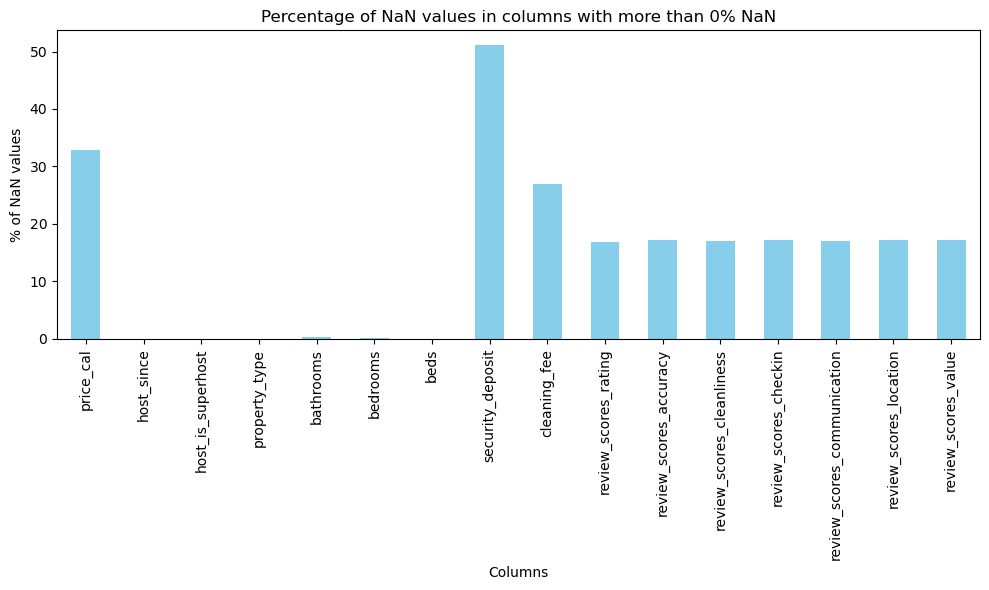

In [9]:
# We extract the number of NaN values per column and draw them on a graph, to see how to continue cleaning data.

# Calculate the % of NaN values in each column
nan_percentage = df.isna().mean() * 100

# Filter columns that have more than 0% NaN values
nan_percentage_filtered = nan_percentage[nan_percentage > 0]

# Display % of NaN values
print(nan_percentage_filtered)

# Plot % NaN values on a graph
plt.figure(figsize=(10, 6))
nan_percentage_filtered.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('% of NaN values')
plt.title('Percentage of NaN values in columns with more than 0% NaN')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# We clean data

def clean_data(extracted_data):
    
    '''
    INPUT
    extracted_data - merged data, listing + calendar. And after interesting columns extracted
    
    OUTPUT
    df - cleaned and prepare data
    '''
    
    # We can dispense with the rows of the listings when they do not have availability, which in turn are the ones with a NaN price
    extracted_data.dropna(subset=['price_cal'],inplace=True)
    
    # date
    extracted_data['date'] = pd.to_datetime(extracted_data['date']) # We make sure that the 'date' column is of datetime type
    extracted_data['date_year'] = extracted_data['date'].apply(extract_year)
    extracted_data['date_month'] = extracted_data['date'].apply(extract_month)

    # host_since - We get the year from the date
    extracted_data['host_since'] = pd.to_datetime(extracted_data['host_since']) # We make sure that the 'host_since' column is of datetime type
    extracted_data['host_since_year'] = extracted_data['host_since'].apply(extract_year) # Create a new column 'host_since_year' to store the year
    host_since_year_mean_rounded = int(round(extracted_data['host_since_year'].mean())) # Calculate the rounded mean and convert to integer
    extracted_data['host_since_year'].fillna(host_since_year_mean_rounded, inplace=True) # Fill NaN values in 'host_since_year' with the mean
    extracted_data['host_since_year'] = extracted_data['host_since_year'].astype('Int64') # Convert to integer
    extracted_data = extracted_data.drop(columns = ['host_since']) # Drop the column we are not going to use
    
    # host_is_superhost
    extracted_data = convert_to_boolean(extracted_data, 'host_is_superhost') # We convert the field to boolean
    extracted_data['host_is_superhost'].fillna(False, inplace=True) # We assume that NaNs are not superhosts, since the % of NaNs is very small and most values are False
    
    # property_type - nada que hacer con ello
    extracted_data['property_type'].fillna('Other', inplace=True) # We fill NaN with type Others since we do not know which category they belong to.
    
    # accommodates - numero
    
    # bathrooms
    extracted_data['bathrooms'].fillna(extracted_data['bathrooms'].mode()[0], inplace=True) # Fill NaN values with the mode
    
    # bedrooms
    extracted_data['bedrooms'].fillna(extracted_data['bedrooms'].mode()[0], inplace=True) # Fill NaN values with the mode
    
    # beds
    extracted_data['beds'].fillna(extracted_data['beds'].mode()[0], inplace=True) # Fill NaN values with the mode
    
    # bed_type - nada
    
    # amenities
    extracted_data = create_dummies(extracted_data, 'amenities', '_amenities')
    
    # price_cal
    extracted_data['price_cal'] = extracted_data['price_cal'].apply(convert_price) # We convert to decimal number
    
    # security_deposit
    extracted_data['security_deposit'] = extracted_data['security_deposit'].apply(convert_price) # We convert to decimal number
    extracted_data['security_deposit'].fillna(0, inplace=True) # We assume that when there is no deposit, we have NaN value, so we fill them with 0
    
    # cleaning_fee
    extracted_data['cleaning_fee'] = extracted_data['cleaning_fee'].apply(convert_price) # We convert to decimal number
    extracted_data['cleaning_fee'].fillna(0, inplace=True) # We assume that when there is no fee, we have NaN value, so we fill them with 0
    
    # guests_included - numero
    
    # extra_people
    extracted_data['extra_people'] = extracted_data['extra_people'].apply(convert_price) # We convert to decimal number
    
    # number_of_reviews - numero
    
    # review_scores_rating
    extracted_data['review_scores_rating'].fillna(extracted_data['review_scores_rating'].mean(), inplace = True)
    
    # review_scores_accuracy
    extracted_data['review_scores_accuracy'].fillna(extracted_data['review_scores_accuracy'].mean(), inplace = True)
    
    # review_scores_cleanliness
    extracted_data['review_scores_cleanliness'].fillna(extracted_data['review_scores_cleanliness'].mean(), inplace = True)
    
    # review_scores_checkin
    extracted_data['review_scores_checkin'].fillna(extracted_data['review_scores_checkin'].mean(), inplace = True)
    
    # review_scores_communication
    extracted_data['review_scores_communication'].fillna(extracted_data['review_scores_communication'].mean(), inplace = True)
    
    # review_scores_location
    extracted_data['review_scores_location'].fillna(extracted_data['review_scores_location'].mean(), inplace = True)
    
    # review_scores_value
    extracted_data['review_scores_value'].fillna(extracted_data['review_scores_value'].mean(), inplace = True)
    
    # cancellation_policy - opciones
    
    return extracted_data

# Function to extract the year from a date
def extract_year(date):
    if pd.isna(date):
        return np.nan
    else:
        return date.year

# Function to extract the month from a date
def extract_month(date):
    if pd.isna(date):
        return np.nan
    else:
        return date.month

# Function to convert t/f to boolean without modifying other values
def convert_to_boolean(convert_df, column_name):
    convert_df[column_name] = convert_df[column_name].apply(lambda x: True if x == 't' else (False if x == 'f' else x))
    return convert_df

# Function to convert prices to decimal
def convert_price(price):
    if pd.isna(price):
        return price  # Return NaN if the value is NaN
    else:
        return float(price.replace('$', '').replace(',', ''))

def create_dummies(df_orig, column_name, suffix):
    #Clean and convert column to lists
    df_orig[column_name] = df_orig[column_name].str.replace(r'[\{\}"]', '', regex=True).str.split(',')
    
    # Create the binarizer
    mlb = MultiLabelBinarizer()
    
    # Fit and transform the data
    col_dummies = mlb.fit_transform(df_orig[column_name])

    # Añadir el sufijo a los nombres de las columnas
    dummy_col_names = [f"{col}{suffix}" for col in mlb.classes_]
    
    # Create a DataFrame with dummy columns
    dummy_df = pd.DataFrame(col_dummies, columns=dummy_col_names, index=df_orig.index)
    
    # Concatenate the original DataFrame with the DataFrame of dummy columns
    df_orig = pd.concat([df_orig, dummy_df], axis=1)

    return df_orig

   value    count
0   True   283970
1  False  1108870
2    NaN      730


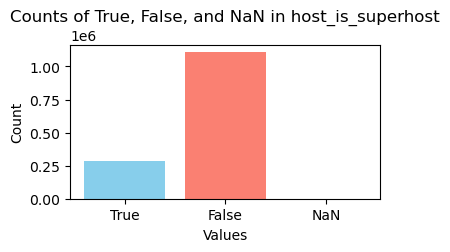

In [11]:
# I do an analysis of host_is_superhost to see how to fill in its NaN
# Count the number of True, False y NaN
host_is_superhost_df = convert_to_boolean(df, 'host_is_superhost')
host_is_superhost_true_count = host_is_superhost_df['host_is_superhost'].sum()
host_is_superhost_false_count = host_is_superhost_df['host_is_superhost'].notna().sum() - host_is_superhost_true_count
host_is_superhost_nan_count = host_is_superhost_df['host_is_superhost'].isna().sum()

# Create a dataframe for the counts
host_is_superhost_counts = pd.DataFrame({
    'value': ['True', 'False', 'NaN'],
    'count': [host_is_superhost_true_count, host_is_superhost_false_count, host_is_superhost_nan_count]
})

# Show counts
print(host_is_superhost_counts)

# Plot the counts on a column chart
plt.figure(figsize=(4, 2))
plt.bar(host_is_superhost_counts['value'], host_is_superhost_counts['count'], color=['skyblue', 'salmon', 'lightgrey'])
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Counts of True, False, and NaN in host_is_superhost')
plt.show()

In [12]:
# Analysis of property_type to see how to fill NaN values
unique_values_list = df['property_type'].unique().tolist()
print(unique_values_list)

value_counts = df['property_type'].value_counts(dropna=False)

# Show results
print(value_counts)

['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV', 'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast', 'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan]
House              632545
Apartment          623420
Townhouse           43070
Condominium         33215
Loft                14600
Bed & Breakfast     13505
Other                8030
Cabin                7665
Camper/RV            4745
Bungalow             4745
Boat                 2920
Tent                 1825
Treehouse            1095
Dorm                  730
Chalet                730
Yurt                  365
NaN                   365
Name: property_type, dtype: int64


In [13]:
df = clean_data(df)
df.head()

,id,date,price_cal,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,Safety Card_amenities,Shampoo_amenities,Smoke Detector_amenities,Smoking Allowed_amenities,Suitable for Events_amenities,TV_amenities,Washer_amenities,Washer / Dryer_amenities,Wheelchair Accessible_amenities,Wireless Internet_amenities
0,241032,2016-01-04,85.0,False,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,1
1,241032,2016-01-05,85.0,False,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,1
9,241032,2016-01-13,85.0,False,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,1
10,241032,2016-01-14,85.0,False,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,1
14,241032,2016-01-18,85.0,False,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,1


In [14]:
# We calculate the maximum, minimum and average of the price
max_price = df['price_cal'].max()
min_price = df['price_cal'].min()
mean_price = df['price_cal'].mean()

print(f"Max Price: {max_price}")
print(f"Min Price: {min_price}")
print(f"Mean Price: {mean_price}")

Max Price: 1650.0
Min Price: 10.0
Mean Price: 137.94485855103355


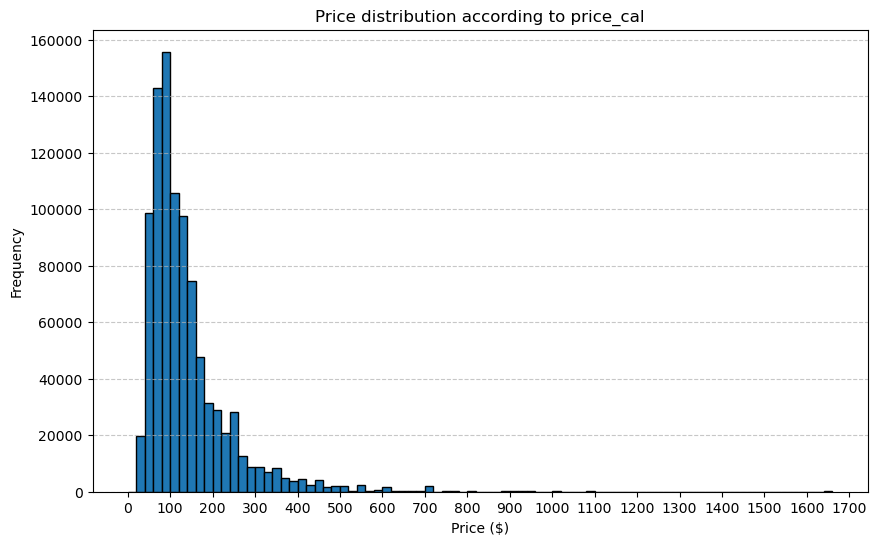

In [15]:
# Create a histogram of the price with bins of size 20
plt.figure(figsize=(10, 6))
plt.hist(df['price_cal'], bins=range(0, int(df['price_cal'].max()) + 20, 20), edgecolor='black')
plt.title('Price distribution according to price_cal')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xticks(range(0, int(df['price_cal'].max()) + 100, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

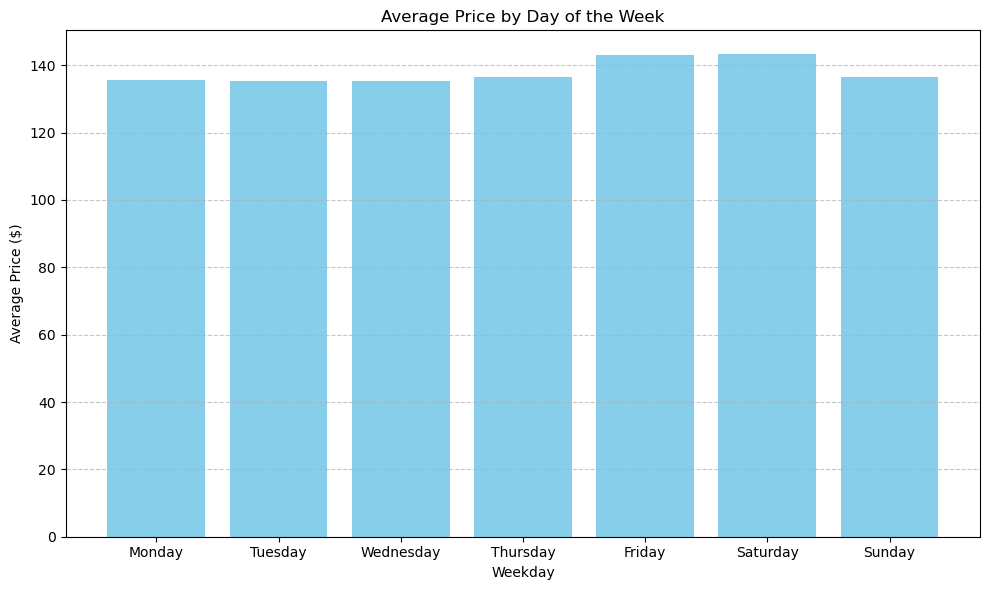

In [16]:
# Group by day of the week and calculate the average price
df['day_of_week'] = df['date'].dt.day_name()
mean_price_per_day = df.groupby('day_of_week')['price_cal'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(mean_price_per_day['day_of_week'], mean_price_per_day['price_cal'], color='skyblue')
plt.title('Average Price by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Average Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

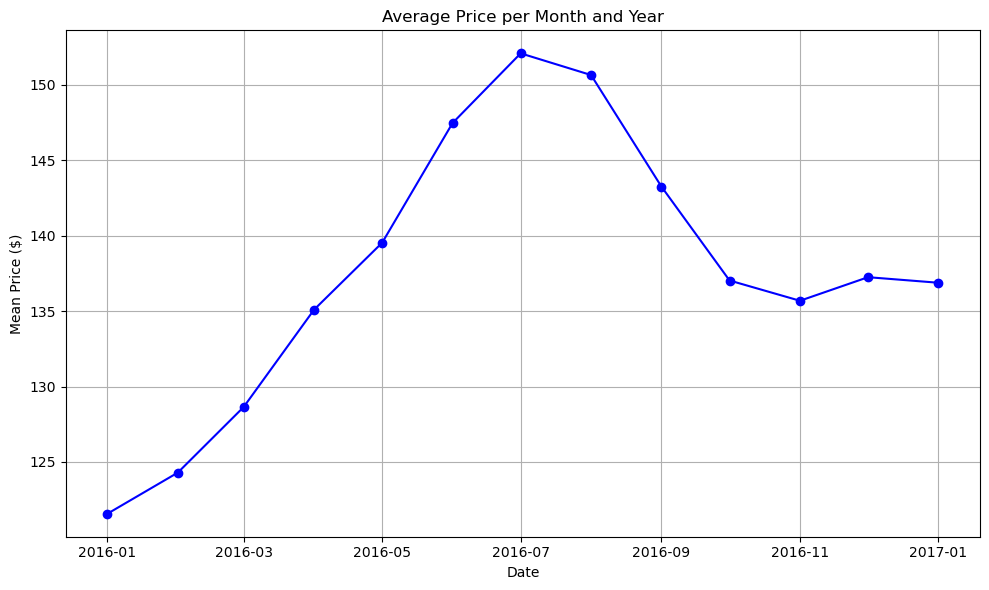

In [17]:
# Group by month and year and calculate the average price
df['year_month'] = df['date'].dt.to_period('M')
mean_price_per_month = df.groupby('year_month')['price_cal'].mean().reset_index()

# Convert 'year_month' to datetime for the chart
mean_price_per_month['year_month'] = mean_price_per_month['year_month'].dt.to_timestamp()

# Painting the time graph
plt.figure(figsize=(10, 6))
plt.plot(mean_price_per_month['year_month'], mean_price_per_month['price_cal'], marker='o', linestyle='-', color='b')
plt.title('Average Price per Month and Year')
plt.xlabel('Date')
plt.ylabel('Mean Price ($)')
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

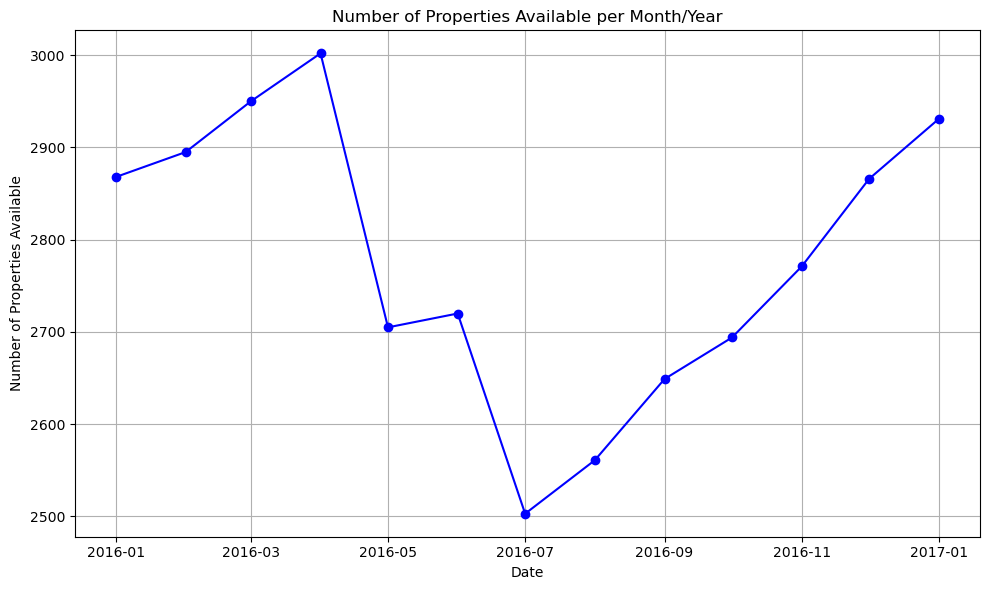

In [18]:
# Count the number of available apartments per month/year
available_units_per_month = df.groupby('year_month')['id'].nunique().reset_index()

# Convert 'year_month' to datetime for clarity
available_units_per_month['year_month'] = available_units_per_month['year_month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(available_units_per_month['year_month'], available_units_per_month['id'], marker='o', linestyle='-', color='b')
plt.title('Number of Properties Available per Month/Year')
plt.xlabel('Date')
plt.ylabel('Number of Properties Available')
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

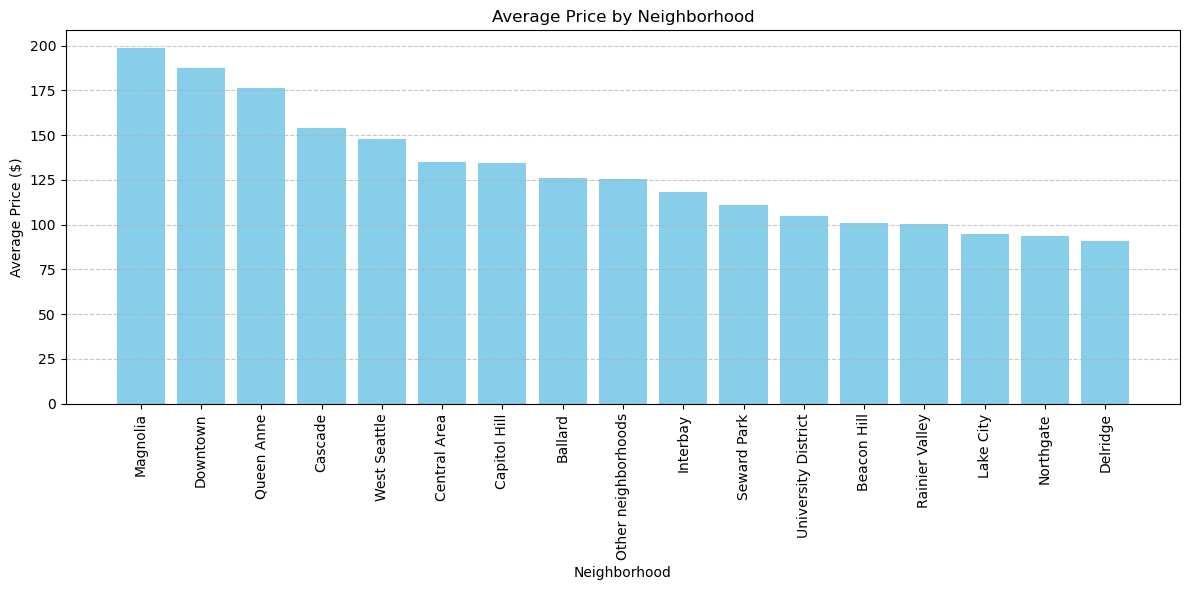

In [19]:
# Calculate the average price by neighbourhood
mean_price_per_neighbourhood = df.groupby('neighbourhood_group_cleansed')['price_cal'].mean().reset_index()

# Sort the DataFrame by average price from highest to lowest
mean_price_per_neighbourhood = mean_price_per_neighbourhood.sort_values(by='price_cal', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(mean_price_per_neighbourhood['neighbourhood_group_cleansed'], mean_price_per_neighbourhood['price_cal'], color='skyblue')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

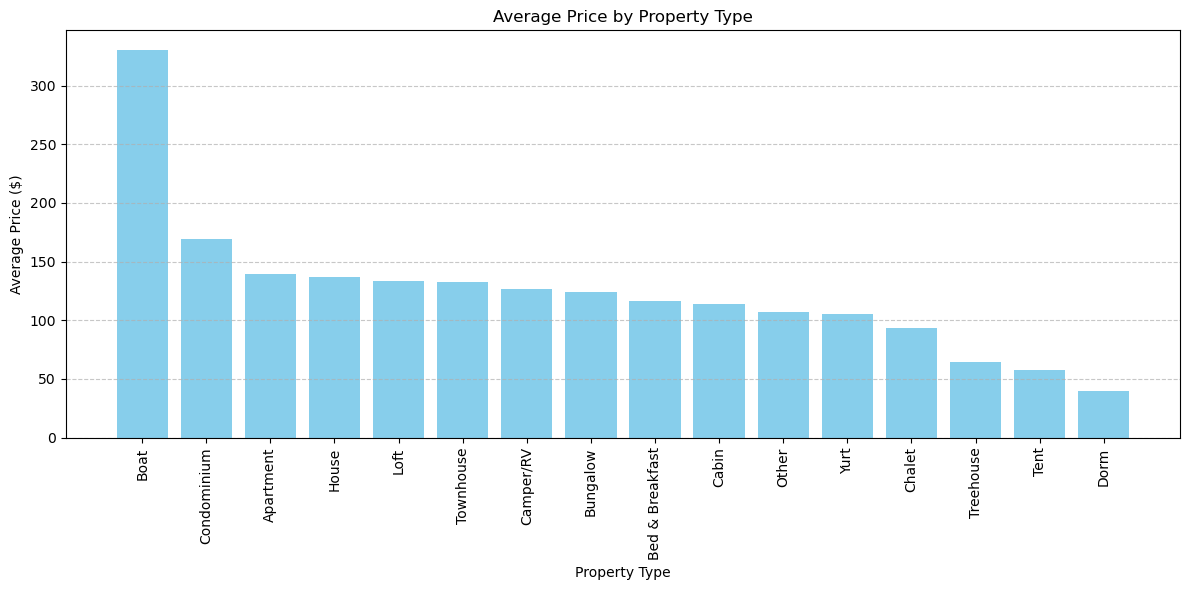

In [20]:
# Calculate the average price by property type
mean_price_per_property_type = df.groupby('property_type')['price_cal'].mean().reset_index()

# Sort the DataFrame by average price from highest to lowest
mean_price_per_property_type = mean_price_per_property_type.sort_values(by='price_cal', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(mean_price_per_property_type['property_type'], mean_price_per_property_type['price_cal'], color='skyblue')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

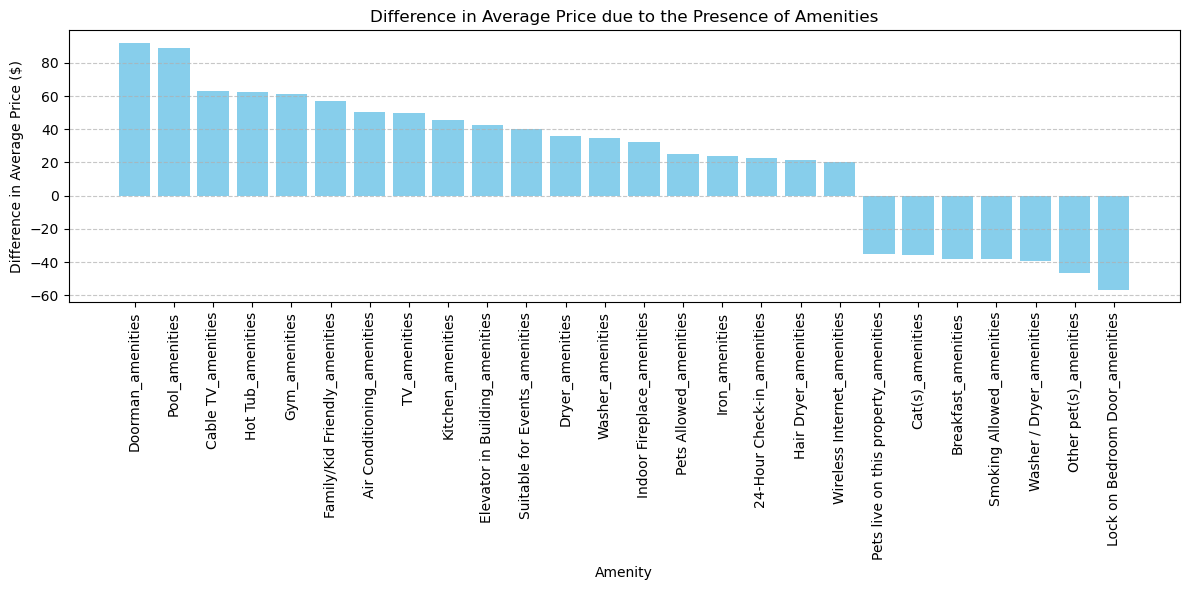

In [21]:
# Calculate the difference in the average price, due to the presence of amenities

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Amenity', 'Price_with_Amenity', 'Price_without_Amenity', 'Difference'])

# Get the amenities columns
amenity_columns = [col for col in df.columns if '_amenities' in col]

# Calculate the average price for apartments with and without each amenity
for amenity in amenity_columns:
    price_with_amenity = df[df[amenity] == 1]['price_cal'].mean()
    price_without_amenity = df[df[amenity] == 0]['price_cal'].mean()
    difference = price_with_amenity - price_without_amenity
    result = pd.DataFrame({
        'Amenity': [amenity],
        'Price_with_Amenity': [price_with_amenity],
        'Price_without_Amenity': [price_without_amenity],
        'Difference': [difference]
    })
    results = pd.concat([results, result], ignore_index=True)

# Filter results where the difference is greater than 20 or less than -20
filtered_results = results[(results['Difference'] > 20) | (results['Difference'] < -20)]

# Sort the results by difference from largest to smallest
filtered_results = filtered_results.sort_values(by='Difference', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_results['Amenity'], filtered_results['Difference'], color='skyblue')
plt.title('Difference in Average Price due to the Presence of Amenities')
plt.xlabel('Amenity')
plt.ylabel('Difference in Average Price ($)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

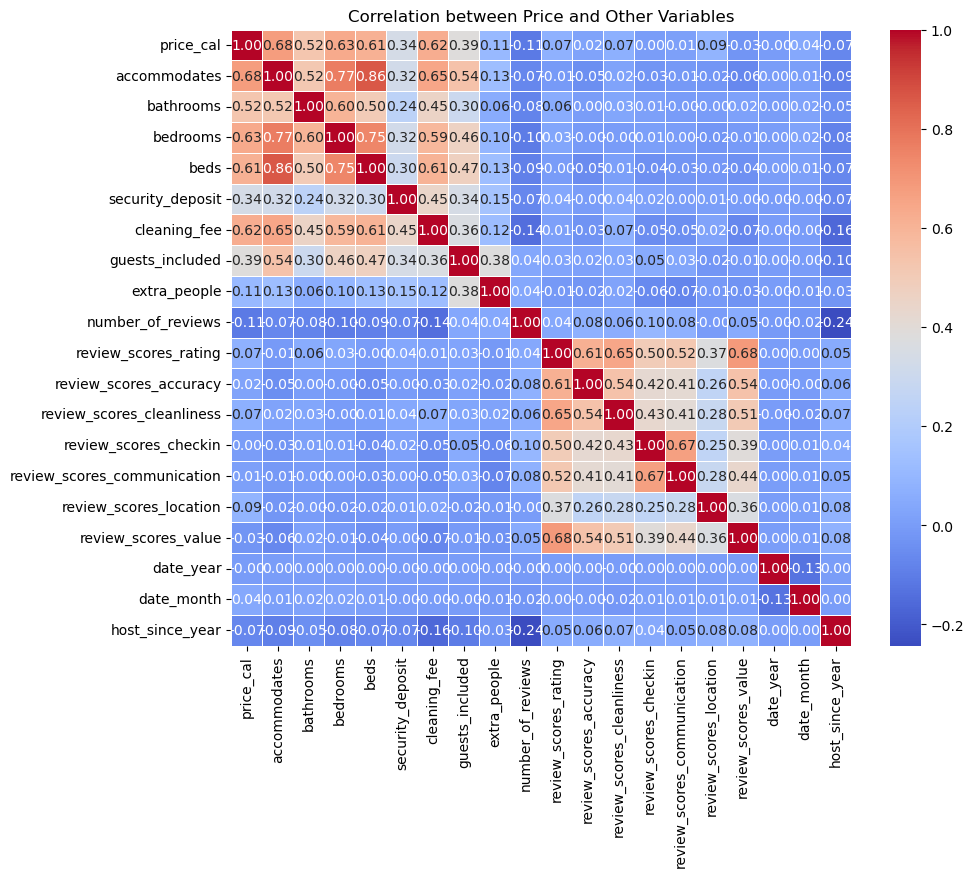

In [22]:
# Filter columns that do not contain "_amenities" in the name and are numeric
non_amenity_columns = [col for col in df.select_dtypes(include='number').columns if '_amenities' not in col and col != 'price_cal']

# Calculate correlation between price and filtered columns
correlation_matrix = df[['price_cal'] + non_amenity_columns].corr()

# Create a heatmap to show the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Price and Other Variables')
plt.show()